<a href="https://colab.research.google.com/github/lucguittard/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Luc_Guittard_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [131]:
import numpy as np
import pandas as pd
numbers = np.array([3505,2400,3027,2798,3700,3250,2689])
def math(array):
  mean = array.sum()/len(array)
  variance = sum((array-mean)**2)/(len(array)-1) #N-1 for samples
  standard_deviation = variance**0.5
  return mean, variance, standard_deviation



print(math(numbers))

(3052.714285714286, 214387.90476190473, 463.0204150595357)


In [0]:
#numbers - 1
#np.var(numbers)
#np.std(numbers)
# check, check, check

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [134]:
df = pd.DataFrame({'last week sales': [3505,2400,3027,2798,3700,3250,2689], 'last week visitors': [127,80,105,92,120,115,93]})
#df.head()
df.cov()

,last week sales,last week visitors
last week sales,214387.904762,7604.357143
last week visitors,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [15]:
numbers2 = np.array([127,80,105,92,120,115,93])
numbers2.std()

15.792015549069118

In [133]:
#Correlation coefficient: r = cov(X,Y)/(std(X)*std(Y))
covariance_XY = 7604.3571
std_X = 463.0204
std_Y = 15.7920
r = covariance_XY/(std_X * std_Y)
print(r) #interesting result that recalls difference in outputs between solving for Inverse of a matrix using lib fxn vs long-form 

1.0399806095842543


In [21]:
df.corr()

,last week sales,last week visitors
last week sales,1.000000,0.962834
last week visitors,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

### Uploading

In [22]:
!wget 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'

--2019-08-27 19:15:07--  https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137509 (134K) [text/plain]
Saving to: ‘titanic_clean.csv’

titanic_clean.csv   100%[===================>] 134.29K  --.-KB/s    in 0.04s   

2019-08-27 19:15:12 (3.53 MB/s) - ‘titanic_clean.csv’ saved [137509/137509]



In [0]:
log = pd.read_csv('titanic_clean.csv') #.head()

In [0]:
print(log.dtypes)
print(log.shape)
log.isnull().sum()  

### Cleaning NaNs

In [0]:
#cleaning log of NaNs 
log.drop(['cabin','boat','body','home.dest'],axis = 1)

In [60]:
log = log.fillna(method = 'bfill')   
log = log.sort_values(by = 'age')
print(log.dtypes)
log.head()
#log.isnull().sum()  #check for zero NaN values

Unnamed: 0            int64
pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object


,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
763,764,3.0,1.0,"Dean, Miss. Elizabeth Gladys ""Millvina""",female,0.1667,1.0,2.0,C.A. 2315,20.5750,F G63,S,10,197.0,"Devon, England Wichita, KS",0
747,748,3.0,0.0,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.3333,0.0,2.0,347080,14.4000,F G63,S,13 15 B,9.0,"Stanton, IA",0
1240,1241,3.0,1.0,"Thomas, Master. Assad Alexander",male,0.4167,0.0,1.0,2625,8.5167,G6,C,16,176.0,"Oslo, Norway Cameron, WI",0
427,428,2.0,1.0,"Hamalainen, Master. Viljo",male,0.6667,1.0,1.0,250649,14.5000,F33,S,4,75.0,"Detroit, MI",0
1111,1112,3.0,0.0,"Peacock, Master. Alfred Edward",male,0.7500,1.0,1.0,SOTON/O.Q. 3101315,13.7750,E121,S,A,206.0,"Oslo, Norway Cameron, WI",0


### Variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns

In [0]:
print(log.dtypes)
log = log.drop('Unnamed: 0',axis = 1)
#log.head() # want all columns of dtype int and float

In [70]:
log2 = log.drop(['name','sex','ticket','cabin','embarked','boat','home.dest'], axis = 1)
print(log2.dtypes)
log2.head()

pclass              float64
survived            float64
age                 float64
sibsp               float64
parch               float64
fare                float64
body                float64
has_cabin_number      int64
dtype: object


,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
763,3.0,1.0,0.1667,1.0,2.0,20.5750,197.0,0
747,3.0,0.0,0.3333,0.0,2.0,14.4000,9.0,0
1240,3.0,1.0,0.4167,0.0,1.0,8.5167,176.0,0
427,2.0,1.0,0.6667,1.0,1.0,14.5000,75.0,0
1111,3.0,0.0,0.7500,1.0,1.0,13.7750,206.0,0


In [71]:
log2.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701812,-0.127357,-3.951584,0.052781,0.013070,-24.218042,0.161405,-0.249923
survived,-0.127357,0.236181,-0.314103,-0.013932,0.034861,6.151406,-0.237498,0.061424
age,-3.951584,-0.314103,165.850021,-2.557851,-1.458263,113.651280,-12.280896,1.463138
sibsp,0.052781,-0.013932,-2.557851,1.084413,0.336722,8.647858,-9.660993,-0.003858
parch,0.013070,0.034861,-1.458263,0.336722,0.748735,9.927754,-6.782586,0.013372
fare,-24.218042,6.151406,113.651280,8.647858,9.927754,2675.845648,-365.159307,10.968906
body,0.161405,-0.237498,-12.280896,-9.660993,-6.782586,-365.159307,8724.928525,-2.073172
has_cabin_number,-0.249923,0.061424,1.463138,-0.003858,0.013372,10.968906,-2.073172,0.174613


In [72]:
log2.corr() #very cool

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312816,-0.366271,0.060502,0.018030,-0.558853,0.002063,-0.713932
survived,-0.312816,1.000000,-0.050187,-0.027529,0.082901,0.244693,-0.005232,0.302469
age,-0.366271,-0.050187,1.000000,-0.190730,-0.130862,0.170603,-0.010209,0.271887
sibsp,0.060502,-0.027529,-0.190730,1.000000,0.373689,0.160539,-0.099322,-0.008865
parch,0.018030,0.082901,-0.130862,0.373689,1.000000,0.221797,-0.083917,0.036982
fare,-0.558853,0.244693,0.170603,0.160539,0.221797,1.000000,-0.075574,0.507451
body,0.002063,-0.005232,-0.010209,-0.099322,-0.083917,-0.075574,1.000000,-0.053115
has_cabin_number,-0.713932,0.302469,0.271887,-0.008865,0.036982,0.507451,-0.053115,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

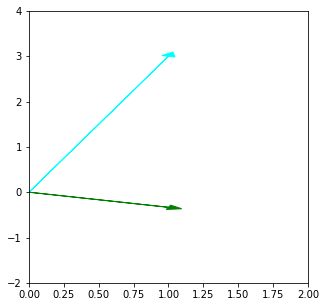

In [82]:
#two vectors are orthagonal/perpendicular if their dot product = 0
v1 = np.array([1,3])
v2 = np.array([1,-1/3])
# np.dot(v1,v2)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (5,5))
plt.arrow(0, 0, v1[0], v1[1], head_width=.1, head_length=0.1, color = 'cyan')
plt.arrow(0, 0, v2[0], v2[1], head_width=.1, head_length=0.1, color = 'green')

plt.xlim(0,2)          
plt.ylim(-2,4)
plt.show();

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [75]:
a = np.array([-5,3,7])
b = np.array([6,-8,2])
np.dot(a,b) # vectors a and b are not orthogonal with one another; their dot-product =! 0

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [86]:
c = np.array([2,-15,6,20])
c_norm_squared = (np.linalg.norm(c))**2
c_dot_c = np.dot(c,c)
c_transpose_by_c = np.matmul((c.T),c)
print(c_norm_squared,c_dot_c,c_transpose_by_c,) # they are all equal, so the dot product of a vector by itself is just 
# its norm squared or just the sum of the values-squared of a vector

665.0 665 665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}


d = $7\begin{bmatrix} 1\\0\end{bmatrix} + 12\begin{bmatrix} 0\\1\end{bmatrix}$ = $7\hat{i} + 12\hat{j}$ 

e = $2\begin{bmatrix} 1\\0\\0\end{bmatrix} + 11\begin{bmatrix} 0\\1\\0\end{bmatrix} - 8\begin{bmatrix} 0\\0\\1\end{bmatrix}$ = $2\hat{i} + 11\hat{j} - 8\hat{k}$


## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [93]:
# the formula: f-hat (the identity matrix of f) = f/f_norm
#f1 = np.array([[4],[12],[11],[9],[2]])  
f = np.array([4,12,11,9,2])
f_norm = np.linalg.norm(f)
f_unit = np.divide(f,f_norm)
f_unit

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

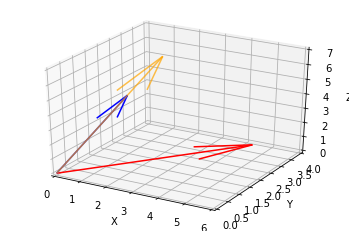

In [106]:
from mpl_toolkits.mplot3d import Axes3D

m = np.array([[0,0,0,1, 2, 4]])
n = np.array([[0,0,0,1.5,3,6]]) #m&n are lin. dep.
o = np.array([[0,0,0,5,3,1]])   #o is lin. indp. with m&n

X, Y, Z, U, V, W = zip(*m)
X2, Y2, Z2, U2, V2, W2 = zip(*n)
X3, Y3, Z3, U3, V3, W3 = zip(*o)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.quiver(X, Y, Z, U, V, W, length=1, color = 'blue')
ax.quiver(X2, Y2, Z2, U2, V2, W2, length=1, color = 'orange', alpha = .7)
ax.quiver(X3, Y3, Z3, U3, V3, W3, length = 1, color = 'r')

ax.set_xlim([0, 6])
ax.set_ylim([0, 4])
ax.set_zlim([0, 7])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show();

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
# The span of these two vectors is just the common line that they lie on. As they are scalars of one another, 
#  they are linearly dependent and thus span just one-dimension, the cartesian line given as y = mx + b, where m = 1/2 and b = 0. 

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

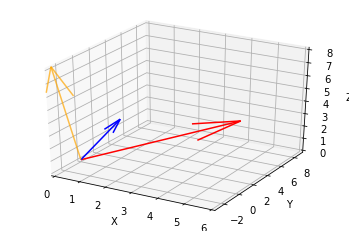

In [121]:
#quick analysis and I think this could be an R3 matrix
#plotting..
from mpl_toolkits.mplot3d import Axes3D


p = np.array([[2, 4, 6]])
p1 = np.array([[4, 8, 12]])
p2 = np.array([[3, 2, 1]])

q = np.array([[0,0,0,1, 2, 3]])
r = np.array([[0,0,0,-1, 0, 7]]) #m&n are lin. dep.
s = np.array([[0,0,0,4,8,2]])   #o is lin. indp. with m&n


Matrix1 = np.array([[q], [r], [s]])
Matrix2 = np.array([[p, p1, p2]])

X, Y, Z, U, V, W = zip(*q)
X2, Y2, Z2, U2, V2, W2 = zip(*r)
X3, Y3, Z3, U3, V3, W3 = zip(*s)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.quiver(X, Y, Z, U, V, W, length=1, color = 'blue')
ax.quiver(X2, Y2, Z2, U2, V2, W2, length=1, color = 'orange', alpha = .7)
ax.quiver(X3, Y3, Z3, U3, V3, W3, length = 1, color = 'r')

ax.set_xlim([0, 6])
ax.set_ylim([-3, 9])
ax.set_zlim([0, 8])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show(); 

# from the plot, the span appears to be all of 3D space; the matrix is R3, a full rank matrix

# print(Matrix2)
# print(np.linalg.matrix_rank(M = Matrix2), np.linalg.matrix_rank(M = Matrix2)) 

#come back to for use of np.linalg.matrix_rank(M) function  -> need to first use np.matrix() to ID a matrix, see later work


# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



In [0]:
plt.axes().set_aspect('equal')

t= [3,1]
g= [2,3]
plt.xlim(0,4)          
plt.ylim(0,4)

plt.arrow(0, 0, t[0], t[1], linewidth=3, head_width=.05, head_length=0.05, color ='purple')
plt.arrow(0, 0, g[0], g[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.title("Basis vectors for R^2")
plt.show()

## 6.2 What does it mean to form a basis?

To form a basis is synonymous with describing the space that can be conveyed by all linear combinations of a set of vectors.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [126]:
P = np.matrix([[1,2,3],[-1,0,7],[4,8,2]])
np.linalg.matrix_rank(P)  #OK, need to be sure to define a matrix via np.matrix() to make use of matrix_rank(M) fxn
#the output, 3, provides that the Rank of P is 3; P has a full rank as each of its 3D vectors are lin. indp. of one-another

3

## 7.2 What does the rank of a matrix tell us?

The rank of a matrix tells what dimension of space it spans. A matrix with a rank of 4 (R4) spans four (full) dimensions, whereas an R2 matix only spans two dimensions.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [136]:
v_vector = np.array([1,3])
w_vector = np.array([-1,2])
numrator = np.dot(w_vector,v_vector)
denmator = np.dot(v_vector,v_vector)
projection_w_on_L = np.multiply((numrator/denmator), v_vector)
print(projection_w_on_L)

[0.5 1.5]


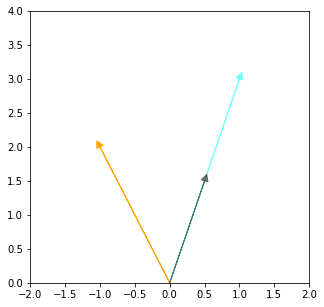

In [144]:
import matplotlib.pyplot as plt



fig, ax = plt.subplots(figsize = (5,5))
plt.arrow(0, 0, v_vector[0], v_vector[1], head_width=.1, head_length=0.1, alpha = .5, color = 'cyan')
plt.arrow(0, 0, w_vector[0], w_vector[1], head_width=.1, head_length=0.1, alpha = 1, color = 'orange')
plt.arrow(0, 0, projection_w_on_L[0], projection_w_on_L[1], head_width=.1, head_length=0.1,alpha = .5, color = 'k')

plt.xlim(-2,2)          
plt.ylim(0,4)
plt.show();
# output looks satisfactory: a shadow vector which if one connected to the w_vector by drawing a line this 
# line would intercept the v_vector at a right-angle; the w_vector and its projection onto L form a right-triangle based 
# on the v_vector

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

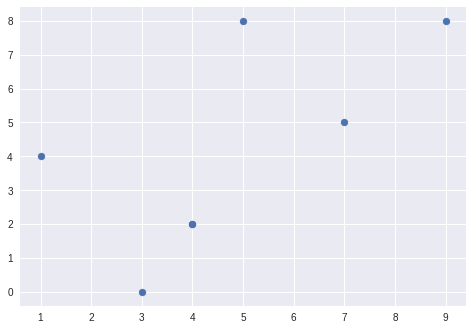

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()